# Importing Packages

In [32]:
import nltk
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import pandas as pd


# Data Collection

In [33]:
# Download stopwords
nltk.download('stopwords')

# Load the dataset (assumed to be a CSV file with columns 'review', 'start', 'duration')
df = pd.read_csv('iphone15-reviews.csv')  # Replace with your dataset path
df.head()



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MOSES\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,start,duration
0,"- Hey, it's Justine and\ntoday we are checking...",0.000,1.710
1,the brand new iPhone 15.,1.710,1.740
2,We've got the Plus in green,3.450,1.590
3,"and the regular iPhone 15 in pink,",5.040,2.493
4,which obviously we know\nthat I'm excited about.,8.698,1.442


# Data Preprocessing 

In [35]:
# Preprocess the 'review' text
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Lowercase text
    text = text.split()  # Tokenize
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if word not in stop_words]  # Remove stopwords
    return ' '.join(text)

df['cleaned_review'] = df['review'].apply(preprocess_text)
df.head()


,review,start,duration,cleaned_review
0,"- Hey, it's Justine and\ntoday we are checking...",0.000,1.710,hey justine today checking
1,the brand new iPhone 15.,1.710,1.740,brand new iphone 15
2,We've got the Plus in green,3.450,1.590,weve got plus green
3,"and the regular iPhone 15 in pink,",5.040,2.493,regular iphone 15 pink
4,which obviously we know\nthat I'm excited about.,8.698,1.442,obviously know im excited


# List of Aspects and Features

In [36]:
# List of common aspects in iPhone reviews
aspects = ['battery', 'camera', 'performance', 'screen', 'design', 'price']

# Function to extract aspects from reviews
def extract_aspects(reviews, aspects):
    aspect_sentiments = {aspect: [] for aspect in aspects}
    for review in reviews:
        for aspect in aspects:
            if aspect in review:
                aspect_sentiments[aspect].append(review)
    return aspect_sentiments

aspect_sentiments = extract_aspects(df['cleaned_review'], aspects)


# Giving sentiment score for every review

In [37]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to assign sentiment (positive, negative, neutral) based on compound score
def get_sentiment(review):
    score = analyzer.polarity_scores(review)['compound']
    if score >= 0.05:
        return 1  # Positive
    elif score <= -0.05:
        return 0  # Negative
    else:
        return 2  # Neutral (you can choose to exclude neutral if you want a binary classification)

# Apply the sentiment function to each review
df['sentiment'] = df['cleaned_review'].apply(get_sentiment)

# Check the distribution of sentiments
print(df['sentiment'].value_counts())
df.head()

2    2638
1    1200
0     213
Name: sentiment, dtype: int64


,review,start,duration,cleaned_review,sentiment
0,"- Hey, it's Justine and\ntoday we are checking...",0.000,1.710,hey justine today checking,2
1,the brand new iPhone 15.,1.710,1.740,brand new iphone 15,2
2,We've got the Plus in green,3.450,1.590,weve got plus green,2
3,"and the regular iPhone 15 in pink,",5.040,2.493,regular iphone 15 pink,2
4,which obviously we know\nthat I'm excited about.,8.698,1.442,obviously know im excited,1


# Handling NULL Values

In [38]:
# Check for NaN values in the dataset
print(df.isnull().sum())

# Drop rows with missing 'cleaned_review' or 'sentiment' values
df = df.dropna(subset=['cleaned_review', 'sentiment'])

# Ensure no NaN values in the final feature matrix (X) and labels (y)
X = tfidf.fit_transform(df['cleaned_review']).toarray()
y = df['sentiment']

# Check if there are any NaN values in X or y
import numpy as np

print(np.isnan(X).sum())  # Should be 0
print(np.isnan(y).sum())  # Should be 0

# Proceed with train/test split and model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


review            0
start             0
duration          0
cleaned_review    0
sentiment         0
dtype: int64
0
0


In [39]:
# Option 1: Drop rows with NaN values (recommended if NaN values are minimal)
df.dropna(inplace=True)

# Option 2: Impute missing values (replace NaNs) if necessary
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # You can also use 'most_frequent' or other strategies
X = imputer.fit_transform(X)


In [28]:
# Ensure that y is numeric
df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')

# Check again if y contains any NaNs or invalid values
print(df['sentiment'].isnull().sum())


0


# Train / Test Split

In [40]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_classifier.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.38      0.53        37
           1       0.97      0.76      0.85       252
           2       0.87      1.00      0.93       522

    accuracy                           0.90       811
   macro avg       0.91      0.71      0.77       811
weighted avg       0.90      0.90      0.89       811



# Function to count positive and negative reviews for each aspect

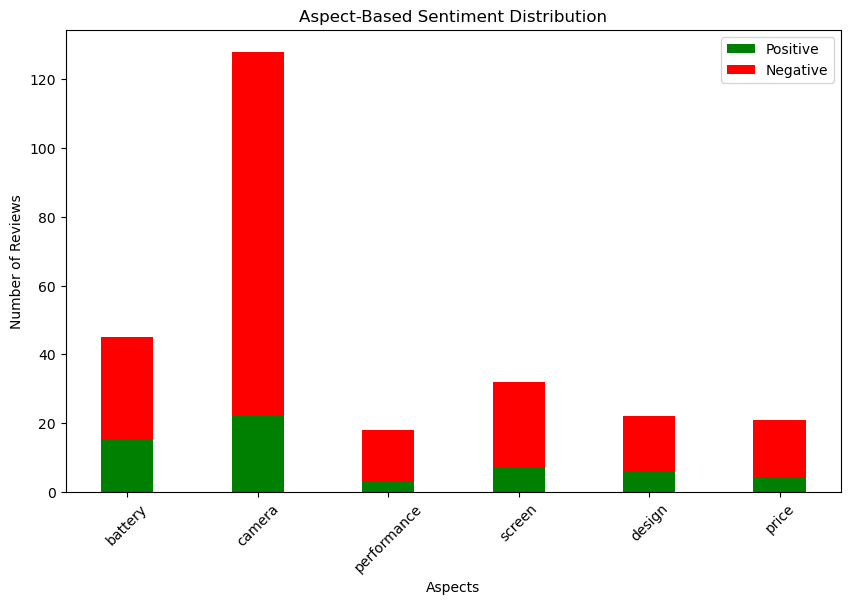

In [30]:

def aspect_sentiment_distribution(aspect_sentiments, df):
    aspect_pos_neg = {aspect: {'positive': 0, 'negative': 0} for aspect in aspects}
    
    for aspect, reviews in aspect_sentiments.items():
        for review in reviews:
            sentiment = df[df['cleaned_review'] == review]['sentiment'].values[0]
            if sentiment == 1:
                aspect_pos_neg[aspect]['positive'] += 1
            else:
                aspect_pos_neg[aspect]['negative'] += 1
    return aspect_pos_neg

aspect_distribution = aspect_sentiment_distribution(aspect_sentiments, df)

# Plotting the results
import matplotlib.pyplot as plt

aspect_labels = list(aspect_distribution.keys())
positive_counts = [aspect_distribution[aspect]['positive'] for aspect in aspect_labels]
negative_counts = [aspect_distribution[aspect]['negative'] for aspect in aspect_labels]

plt.figure(figsize=(10, 6))
bar_width = 0.4
plt.bar(aspect_labels, positive_counts, width=bar_width, label='Positive', color='green')
plt.bar(aspect_labels, negative_counts, width=bar_width, label='Negative', color='red', bottom=positive_counts)

plt.title('Aspect-Based Sentiment Distribution')
plt.xlabel('Aspects')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.legend()
plt.show()


# Generating  word cloud for positive / negative reviews

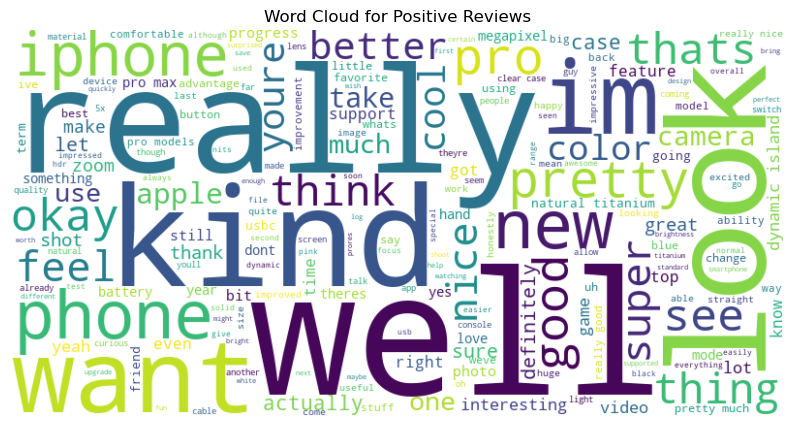

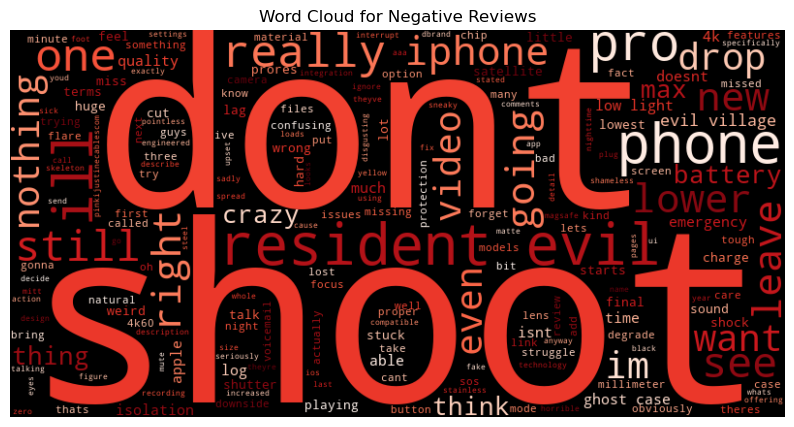

In [31]:
from wordcloud import WordCloud

# Generate word cloud for positive reviews
positive_reviews = ' '.join(df[df['sentiment'] == 1]['cleaned_review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

# Generate word cloud for negative reviews
negative_reviews = ' '.join(df[df['sentiment'] == 0]['cleaned_review'])
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()
